In [58]:
# standard libraries import
import os
import glob
import math
import json
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from PIL import Image


# functions and libraires from competition github
from dataclasses import dataclass
from io_f import read_data_file
from visualize_f import visualize_heatmap, visualize_trajectory

## EDA helper functions 

In [59]:
def plot_all_floors(path_to_building):
    plt.figure(figsize=(16, 10))
    floor_paths = glob.glob(os.path.join(path_to_building, "*/floor_image.png"))
    for ind, floor_path in enumerate(floor_paths):
        w = math.ceil(len(floor_paths) / 2)
        h = math.ceil(len(floor_paths) / w)
        if len(floor_paths) <= 4:
            w = 4
            h = 1
        plt.subplot(h, w, ind + 1)
        image = cv2.imread(floor_path)  
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.axis("off")
        plt.title(floor_path.split("/")[-2], fontsize=16)
    plt.show()

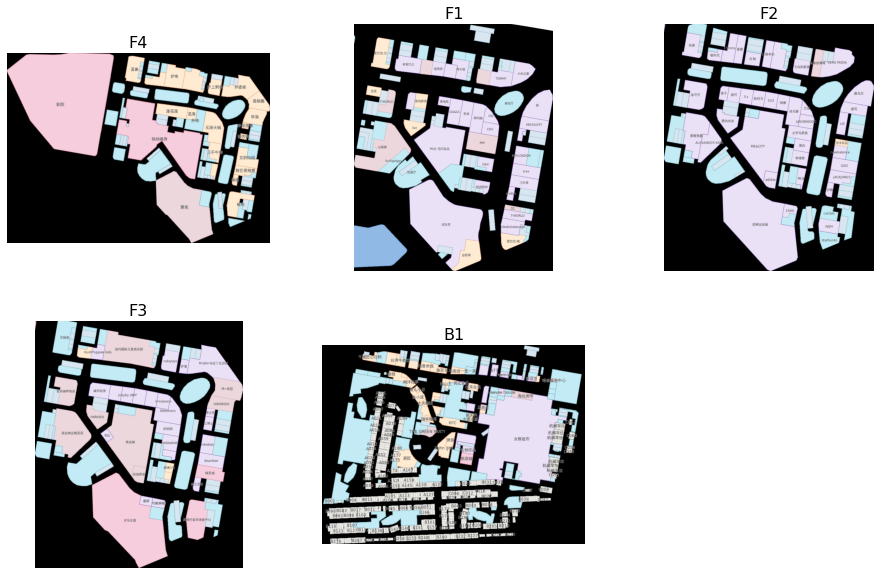

In [60]:
plot_all_floors("metadata/5a0546857ecc773753327266/")

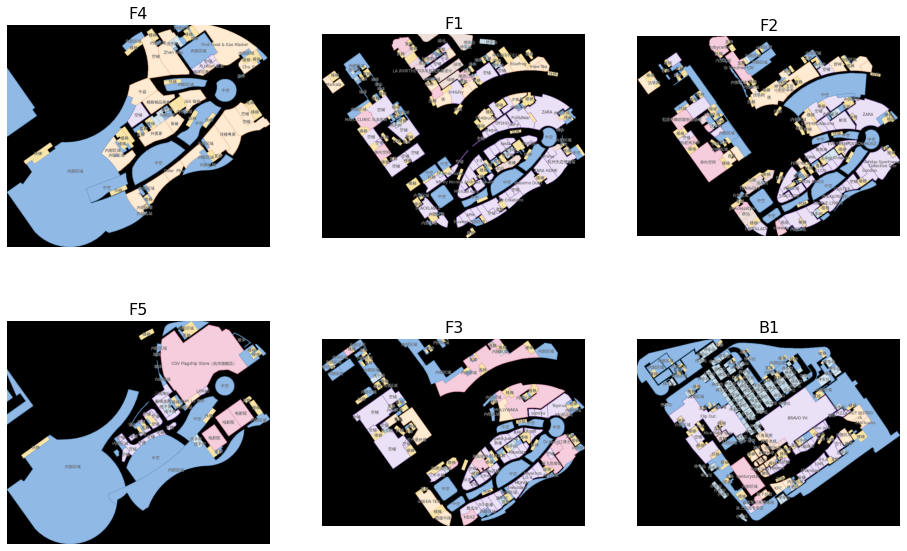

In [61]:
plot_all_floors("metadata/5c3c44b80379370013e0fd2b/")

In [62]:
trainSitesList = os.listdir('train/')
print(f"Number of train sites {len(trainSitesList)}")

Number of train sites 204


In [63]:
sampleSubmissionCSV = pd.read_csv('sample_submission.csv')

In [64]:
sampleSubmissionCSV.head(3)

,site_path_timestamp,floor,x,y
0,5a0546857ecc773753327266_046cfa46be49fc1083481...,0,75.0,75.0
1,5a0546857ecc773753327266_046cfa46be49fc1083481...,0,75.0,75.0
2,5a0546857ecc773753327266_046cfa46be49fc1083481...,0,75.0,75.0


In [65]:
testSitePathTimestampData = sampleSubmissionCSV['site_path_timestamp'].str.split('_', expand=True)
testSitePathTimestampData.head(3)

,0,1,2
0,5a0546857ecc773753327266,046cfa46be49fc10834815c6,0000000000009
1,5a0546857ecc773753327266,046cfa46be49fc10834815c6,0000000009017
2,5a0546857ecc773753327266,046cfa46be49fc10834815c6,0000000015326


In [66]:
print("testSitePathTimestampData.columns = ", testSitePathTimestampData.columns)

testSitePathTimestampData.columns =  RangeIndex(start=0, stop=3, step=1)


In [67]:
# testSites listed as separate folders under train/
trainSitesList = os.listdir('train/')
print(f"Number of train sites {len(trainSitesList)}")

uniqueTestSitesList = testSitePathTimestampData.loc[:,0].unique().tolist()
print(f"Number of test sites {len(uniqueTestSitesList)}")

Number of train sites 204
Number of test sites 24


In [68]:
uniqueTestSitesList[0:5]

['5a0546857ecc773753327266',
 '5c3c44b80379370013e0fd2b',
 '5d27075f03f801723c2e360f',
 '5d27096c03f801723c31e5e0',
 '5d27097f03f801723c320d97']

In [72]:
trainSampleData = read_data_file("train/5a0546857ecc773753327266/B1/5e15730aa280850006f3d005.txt")

In [93]:
def plotIMUData(inputData, sensorType):
    axesList = ['x', 'y', 'z']
    numColumns = inputData.shape[1]
    
    # delta time in seconds
    timeInSeconds = (inputData[:,0] - inputData[0,0]) / 1000.0
    
    # plot 3-axis data
    fig, axes = plt.subplots(numColumns-1,1, sharex=True, figsize=(15,6))
    fig.suptitle(sensorType + ' Data')
    for i in range(0, numColumns-1):
        axes[i].plot(timeInSeconds, inputData[:,i+1])
        axes[i].set_ylabel(sensorType + '_' + axesList[i])
    plt.xlabel('Time in seconds')
    plt.show()

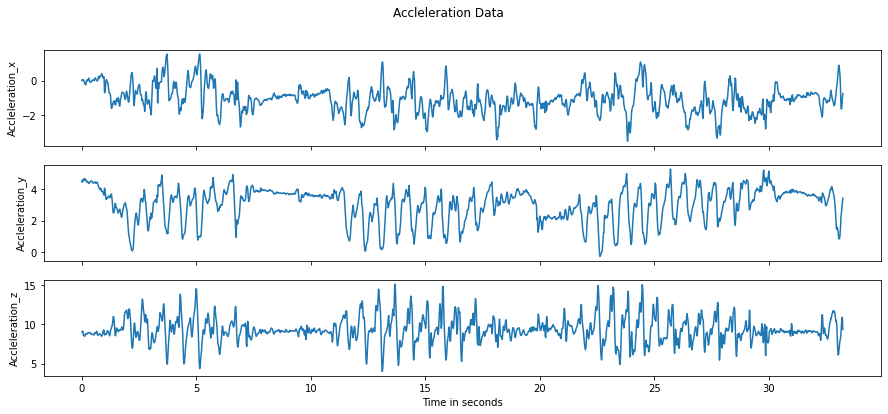

In [94]:
plotIMUData(trainSampleData.acce, 'Accleleration')

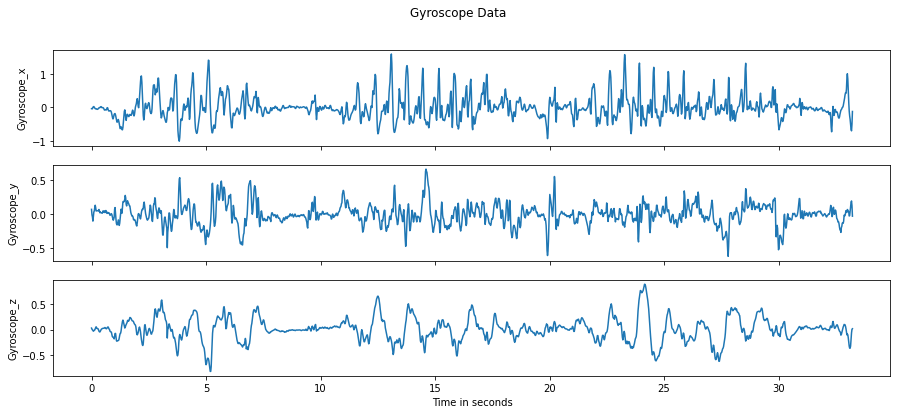

In [95]:
plotIMUData(trainSampleData.gyro, 'Gyroscope')

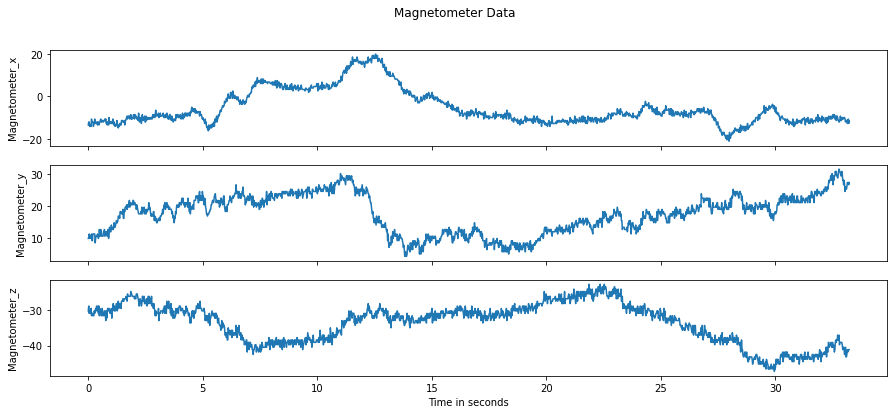

In [97]:
plotIMUData(trainSampleData.magn, 'Magnetometer')

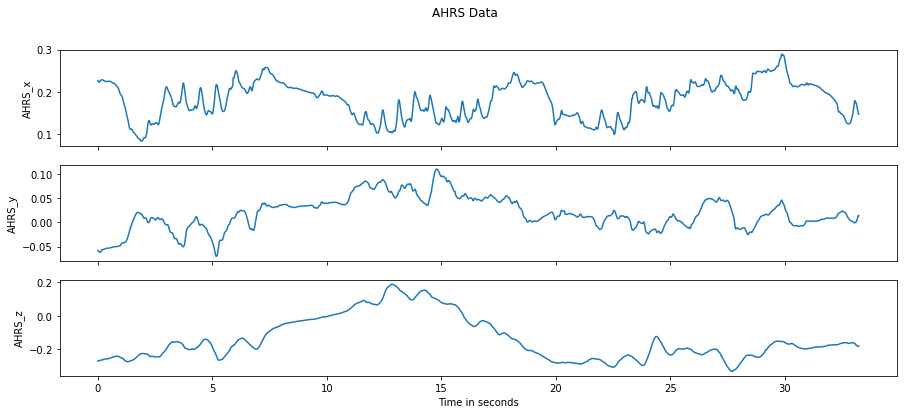

In [96]:
plotIMUData(trainSampleData.ahrs, 'AHRS')